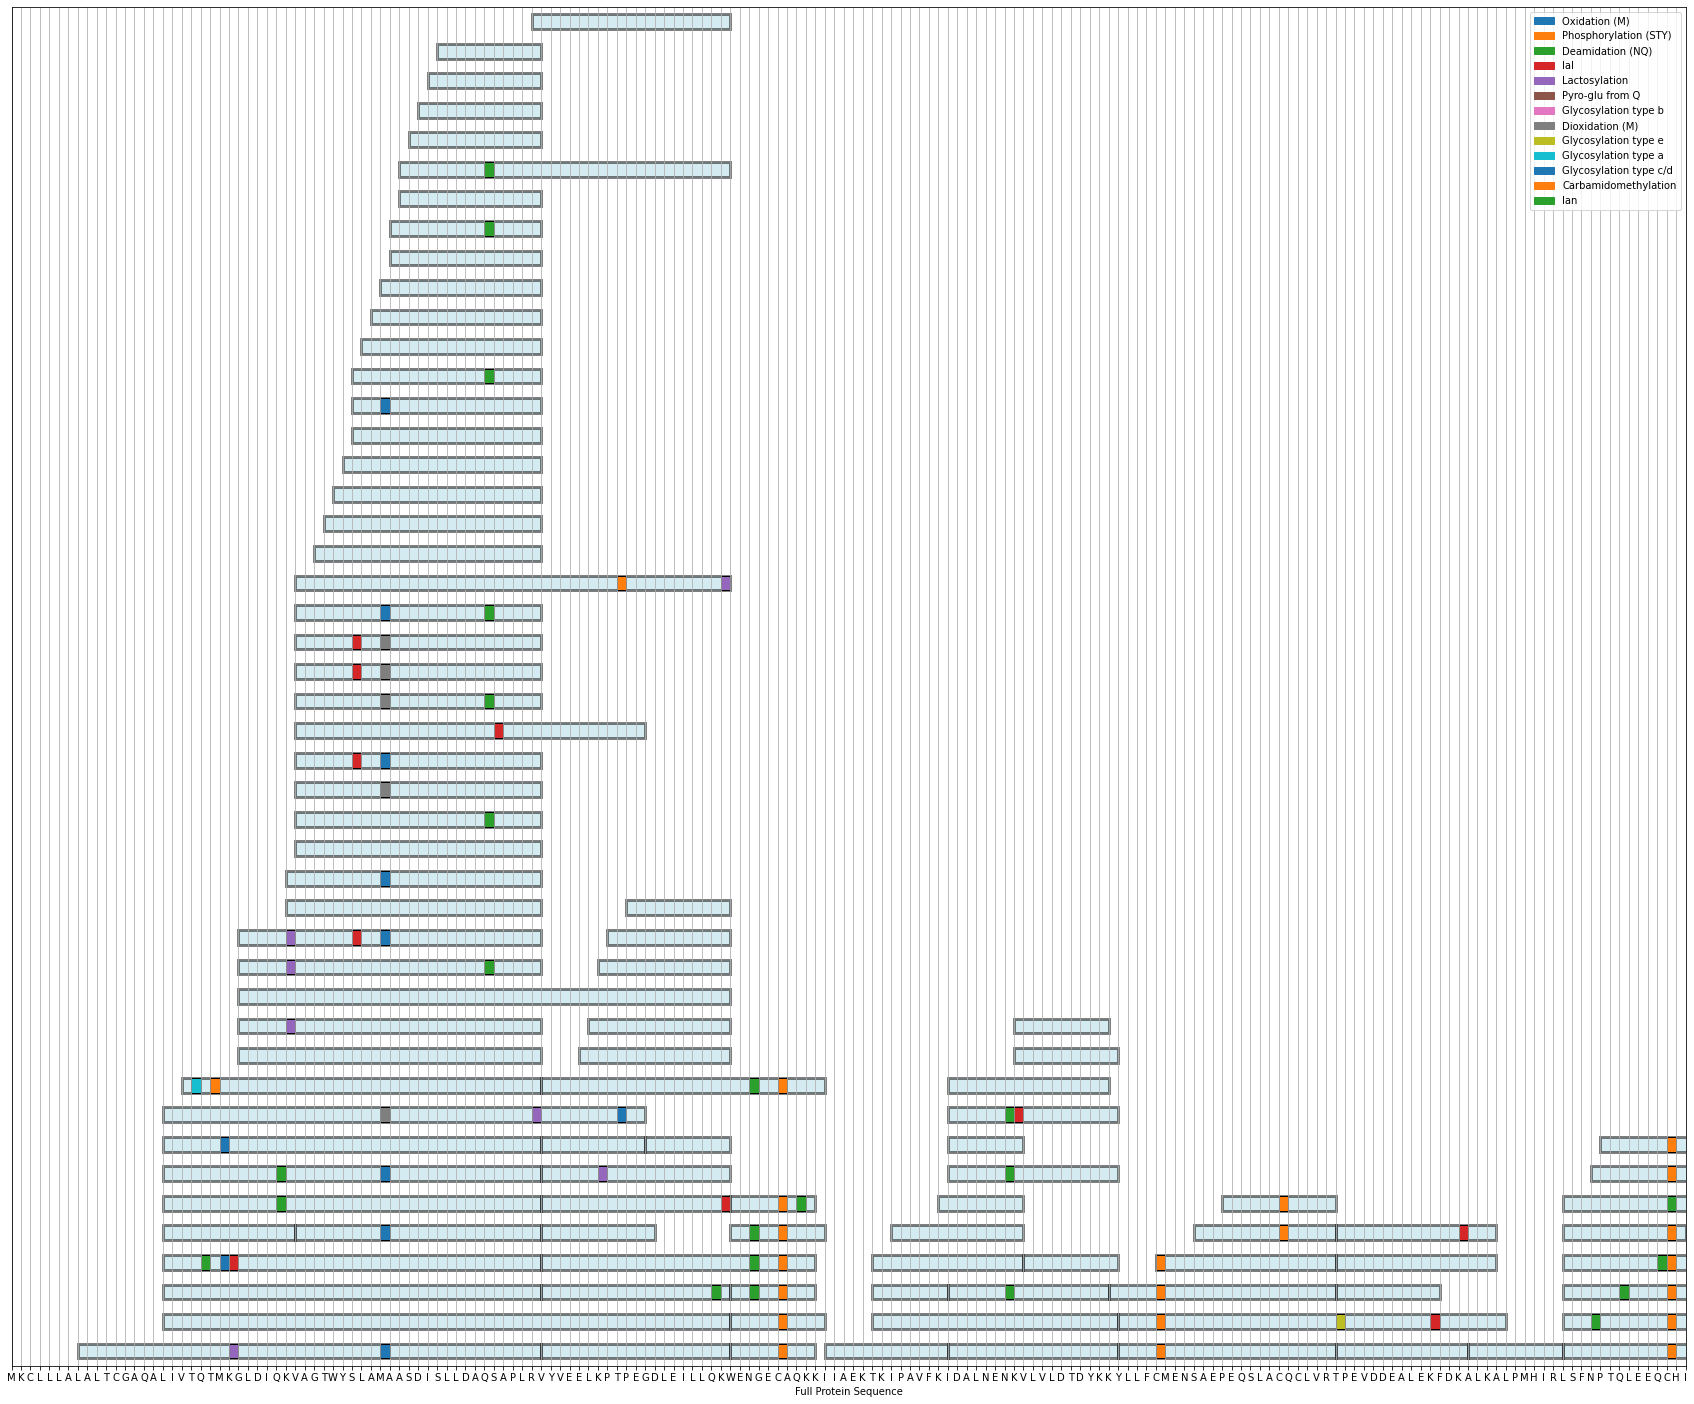

<AxesSubplot:xlabel='Full Protein Sequence'>

In [4]:
from utils import get_data_and_remove_unwanted_columns, sanitize_data, preprocess_data_for_peptide_segment_plot, get_peptide_segments_and_modifications, plot_peptide_segments, normalize_intensities_by_protein_intensity, split_data_in_samples, get_protein_sequence, get_overlap_overlaps_by_intensity_and_sample, get_overlap_pixel_plot, get_gradient_plot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

_protein = "P02754"
df = get_data_and_remove_unwanted_columns()
df = sanitize_data(df)
dfs = normalize_intensities_by_protein_intensity(df)

data = preprocess_data_for_peptide_segment_plot(df, _protein = _protein, size=100)
rectatngles, modifications, height = get_peptide_segments_and_modifications(data, 0.5, _protein)
plot_peptide_segments(rectatngles, modifications, height, _protein)